In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import matplotlib.colors as mpc

In [2]:
import os
data_dir = f"{os.environ['SCRATCH']}/bml/pm5V"
Q = list()
V_app = list()
V_fe_avg = list()
t_fe = list()
for path in glob.glob(f"{data_dir}/*/data.npz"):
    _tfe  = float(path.split('/')[-2][:-2])
    if _tfe > 12.0:
        continue
    npz = np.load(path)
    V_fe_avg.append(npz['V_fe_avg'])
    Q.append(npz['Q'])
    V_app.append(npz['V_app'])
    t_fe.append(_tfe)
    
Q = np.array(Q)
V_app = np.array(V_app)
V_fe_avg = np.array(V_fe_avg)
t_fe = np.array(t_fe)
order = np.argsort(t_fe)

t_fe = t_fe[order]
Q = Q[order]
V_app = V_app[order]
V_fe_avg = V_fe_avg[order]

print(t_fe)

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12. ]


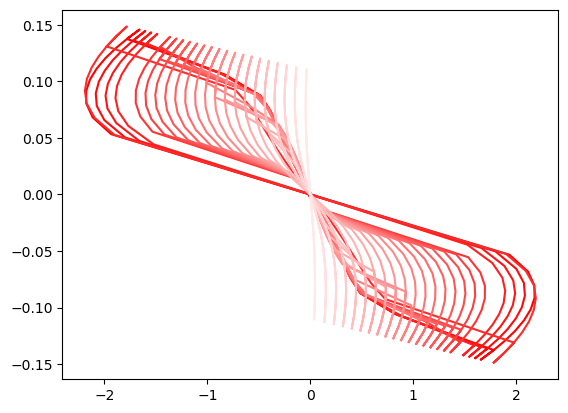

In [3]:
cmap = mpc.LinearSegmentedColormap.from_list('mycmap', [(1.0,1.0,1.0), 'Red'])

norm = t_fe.max()
for i in range(len(t_fe)):
    i = len(t_fe) - i - 1
    plt.plot(V_fe_avg[i], Q[i], c=cmap(t_fe[i]/norm));

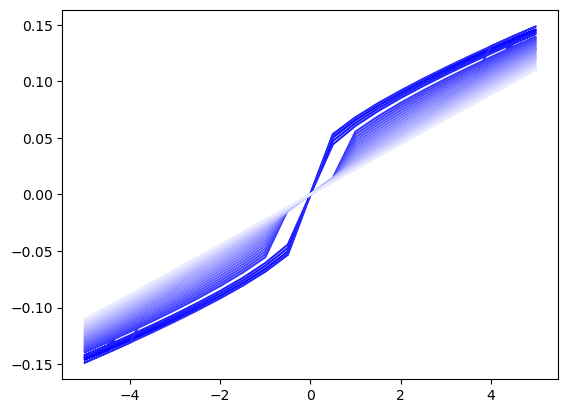

In [4]:
cmap = mpc.LinearSegmentedColormap.from_list('mycmap', [(1.0,1.0,1.0), 'Blue'])

norm = t_fe.max()
for i in range(len(t_fe)):
    i = len(t_fe) - i - 1
    plt.plot(V_app[i], Q[i], c=cmap(t_fe[i]/norm));

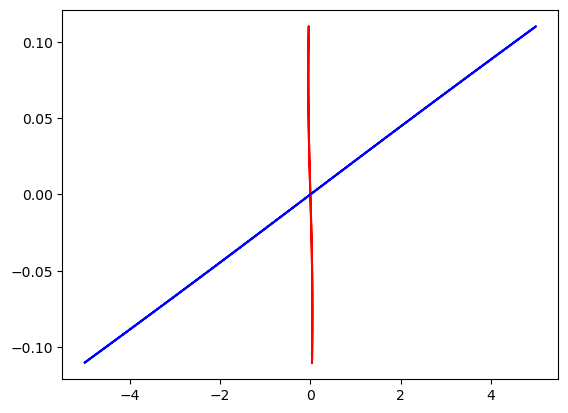

In [5]:
plt.plot(V_fe_avg[0], Q[0], c='Red')
plt.plot(V_app[0], Q[0], c='Blue')

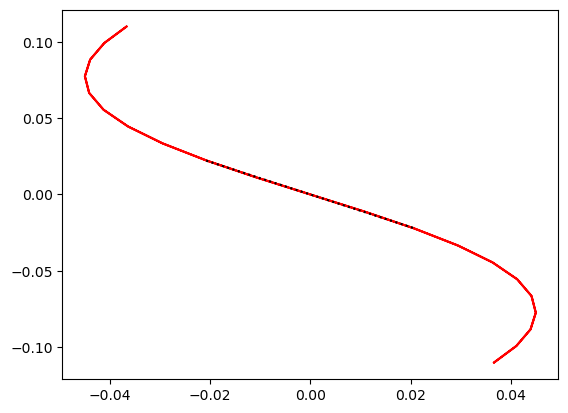

In [6]:
from scipy.stats import linregress


def calc_C(X, Y, step=5):
    order = np.argsort(X)
    mid = len(X) // 2
    order = order[mid-step:mid+step] 
    X, Y = X[order], Y[order]
    return linregress(X, Y), X, Y



def plot_fit(X, Y, ax=None, step=5):
    lm, fit_X, _ = calc_C(X, Y, step=step)
    if ax is None:
        ax = plt.gca()
    ax.plot(X, Y, c='Red')
    x = np.linspace(fit_X.min(), fit_X.max(), 10)
    ax.plot(x, x*lm.slope + lm.intercept, ls=':', c='k')
    return lm
plot_fit(V_fe_avg[0], Q[0]);

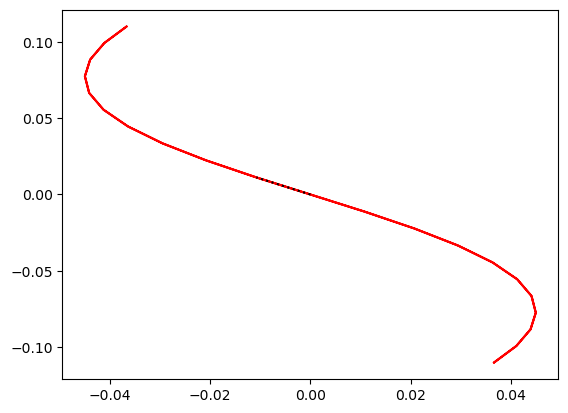

In [7]:
def calc_C_thresh(X, Y):
    for j in range(1, len(X)):
        s = X[j-1]
        e = X[j]
        if s > 0 and e < 0:
            s = j - 1
            e = j
            break
    slope = (Y[e] - Y[s])/(X[e] - X[s])
    return slope, [s, e]


def plot_fit_thresh(X, Y, ax=None):
    slope, fit_idx = calc_C_thresh(X, Y)
    if ax is None:
        ax = plt.gca()
    ax.plot(X, Y, c='Red')
    ax.plot(X[fit_idx], Y[fit_idx], ls=':', c='k')
    return slope
plot_fit_thresh(V_fe_avg[0], Q[0]);

From 3.0nm $T_{fe}$ we observe multi-domain polarization. and corresponding Q/V characteristics shows multiple hysterisis 


Interested in multi-domain induced negative capacitance

In [8]:
V_fe_avg.shape

(23, 41)

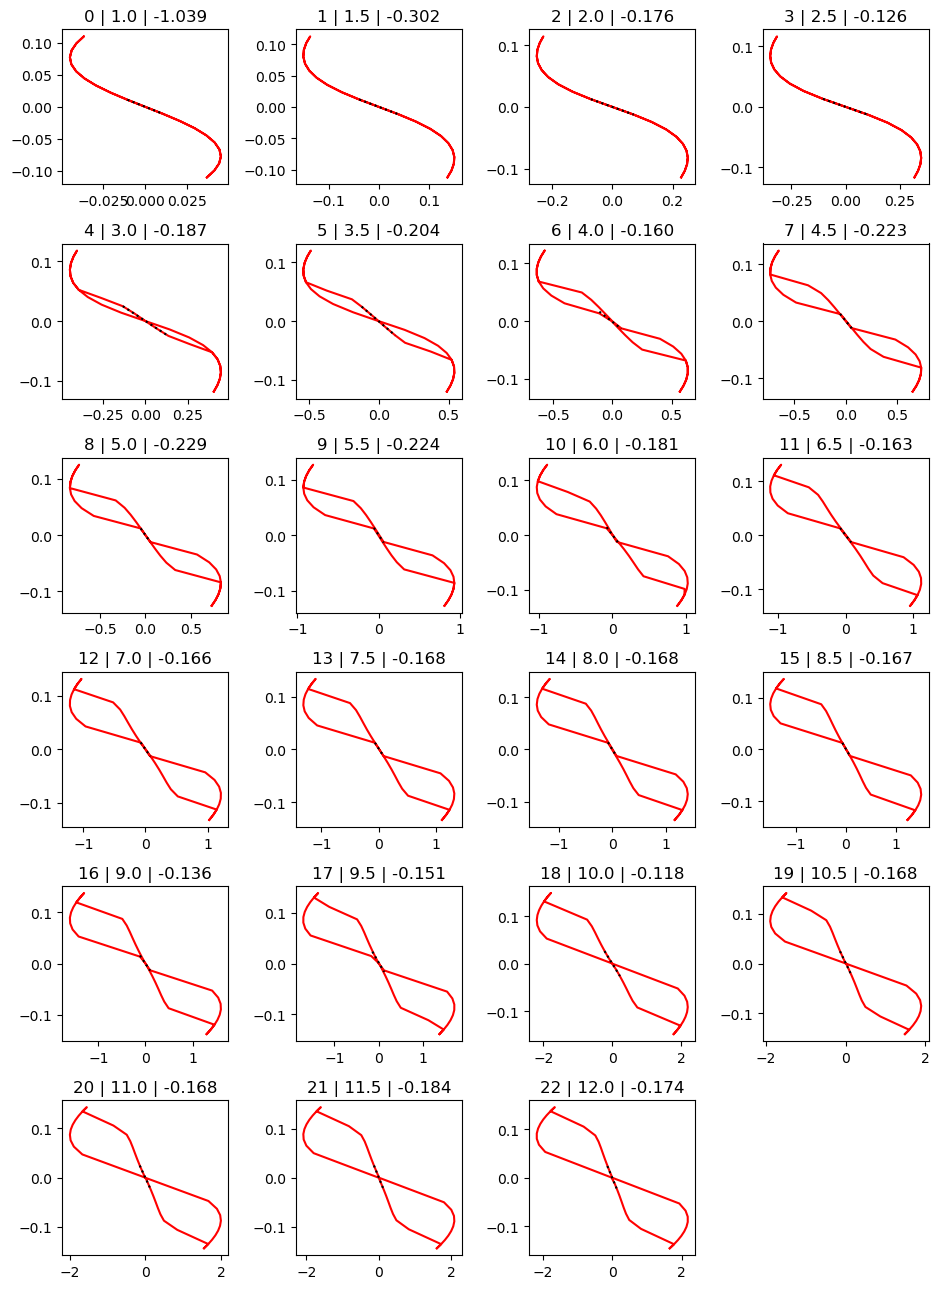

In [9]:
fig, axes = plt.subplots(6, 4, figsize=(9.5, 13))
axes = axes.ravel()
for i in range(len(t_fe)):
    ax = axes[i]
    lm = plot_fit(V_fe_avg[i], Q[i], ax=ax, step=3)
    ax.set_title(f"{i} | {t_fe[i]:0.1f} | {lm.slope:0.3f}")
for ax in axes[i+1:]:
    ax.axis('off')
plt.tight_layout()
plt.savefig('slopes.png')

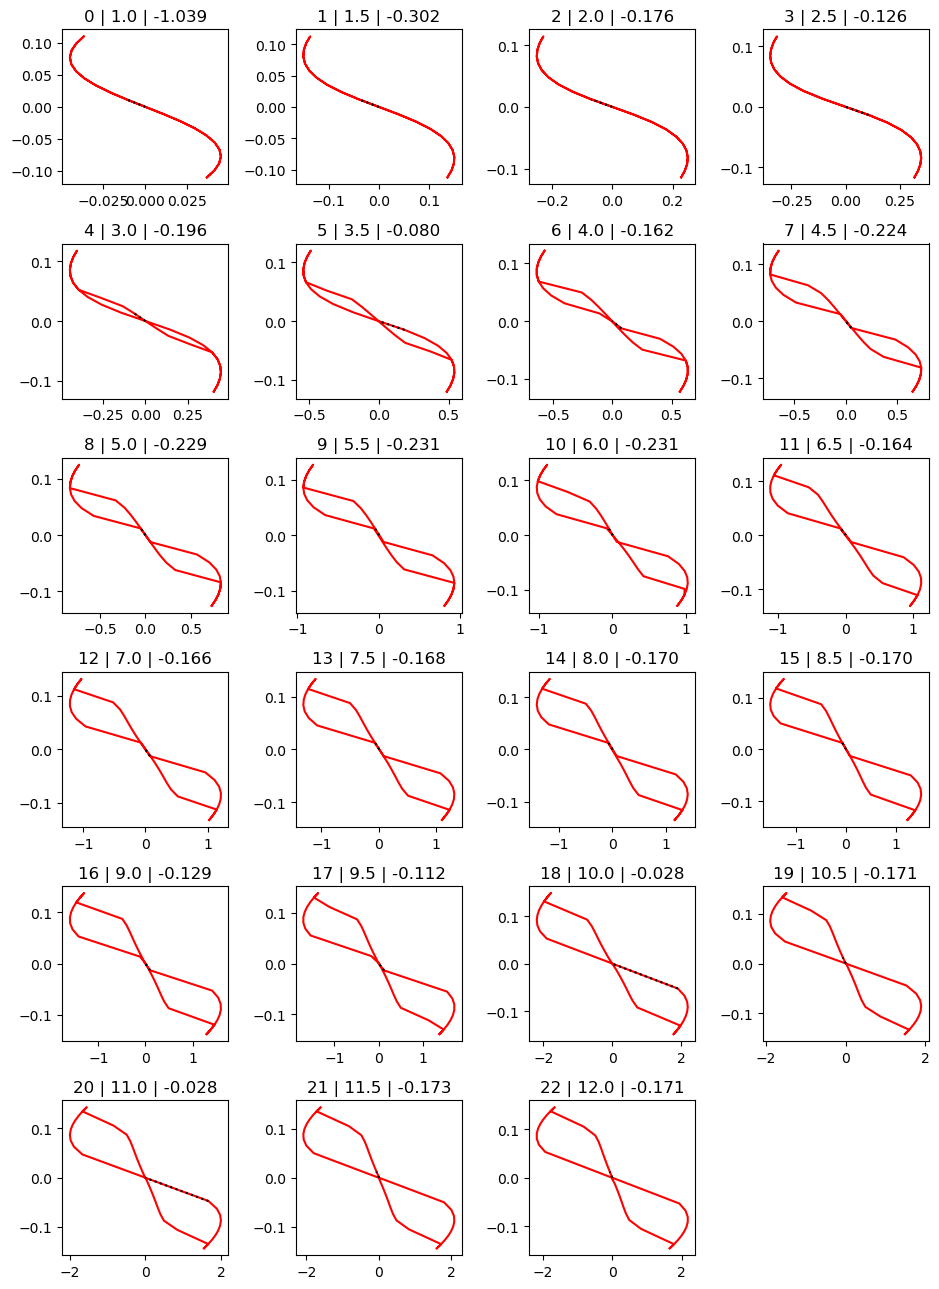

In [10]:
fig, axes = plt.subplots(6, 4, figsize=(9.5, 13))
axes = axes.ravel()
for i in range(len(t_fe)):
    ax = axes[i]
    slope = plot_fit_thresh(V_fe_avg[i], Q[i], ax=ax)
    ax.set_title(f"{i} | {t_fe[i]:0.1f} | {slope:0.3f}")
for ax in axes[i+1:]:
    ax.axis('off')
plt.tight_layout()
plt.savefig('slopes_thresh.png')

[ 1.54536993  1.65677228  1.7574749   1.84519931  1.91675652  1.96745515
  1.98991062  1.97130667  1.88566472  1.6621292  -0.00640886 -0.07948848
 -0.14928158 -0.21445695 -0.27529805 -0.33444989 -0.39932005 -0.49164909
 -0.8418269  -1.65677228 -1.54536993 -1.65677228 -1.7574749  -1.84519931
 -1.91675652 -1.96745515 -1.98991062 -1.97130667 -1.88566472 -1.66212494
  0.00309616  0.07601837  0.14570272  0.21089026  0.27184914  0.33120609
  0.39640259  0.48922052  0.84059841  1.65677228  1.54536993]
[-1.43236495e-01 -1.34732566e-01 -1.25994487e-01 -1.16972398e-01
 -1.07596512e-01 -9.77641640e-02 -8.73137532e-02 -7.59648128e-02
 -6.31488374e-02 -4.73152950e-02  5.84811407e-05  1.26006480e-02
  2.50744756e-02  3.74491489e-02  4.97296268e-02  6.19738761e-02
  7.43435877e-02  8.73143448e-02  1.05935565e-01  1.34732566e-01
  1.43236495e-01  1.34732566e-01  1.25994487e-01  1.16972398e-01
  1.07596512e-01  9.77641640e-02  8.73137532e-02  7.59648128e-02
  6.31488374e-02  4.73151916e-02 -2.59505174e

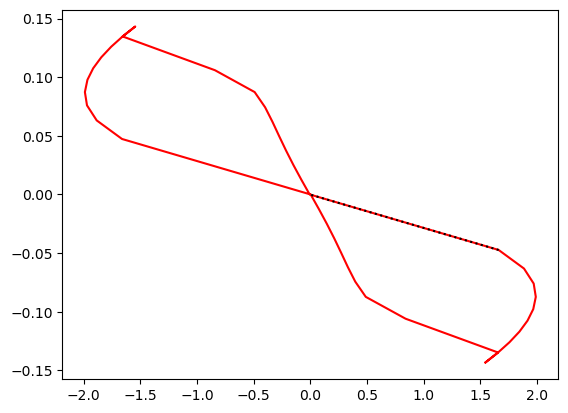

In [11]:
i = 20
ax = plt.gca()
lm, fit_idx = calc_C_thresh(V_fe_avg[i], Q[i])
ax.plot(V_fe_avg[i], Q[i], c='Red')
ax.plot(V_fe_avg[i][fit_idx], Q[i][fit_idx], ls=':', c='k')
print(V_fe_avg[i])
print(Q[i])

In [12]:
C = np.zeros_like(t_fe)
for i in range(len(t_fe)):
    C[i] = calc_C(V_fe_avg[i], Q[i], step=3)[0].slope

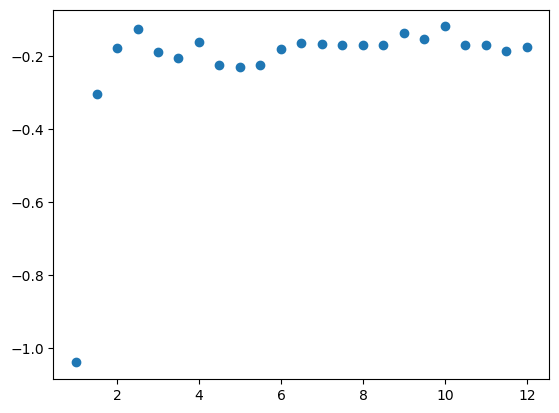

In [13]:
plt.scatter(t_fe, C)

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

kernel = 1.0 * RBF(length_scale=1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-10, 1e1)
)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.0)
gpr.fit(t_fe.reshape(-1, 1), C)
y_mean, y_std = gpr.predict(t_fe.reshape(-1, 1), return_std=True)

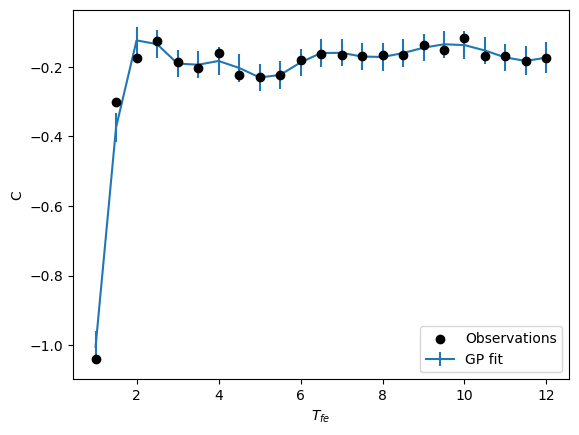

In [15]:
#plt.plot(X, y, label="Expected signal")

plt.errorbar(t_fe, y_mean, y_std, label='GP fit')
plt.scatter(x=t_fe, y=C, color="black", label="Observations", zorder=5)
plt.legend()
plt.xlabel("$T_{fe}$")
plt.ylabel("C")
plt.savefig('capacitance_fit.png')

In [54]:
def plot_gpr_samples(gpr_model, n_samples, ax, Xmin=None, Xmax=None):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    if Xmin is None:
        Xmin = gpr.X_train_.min()
    if Xmax is None:
        Xmax = gpr.X_train_.max()
    fudge = (Xmax - Xmin)*0.0
    print(Xmin, Xmax, fudge)
    Xmin -= fudge
    Xmax += fudge

    x = np.linspace(Xmin, Xmax, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.scatter(gpr.X_train_[:, 0], gpr.y_train_, c='red')
    #ax.set_ylim([-3, 3])

3 11 0.0


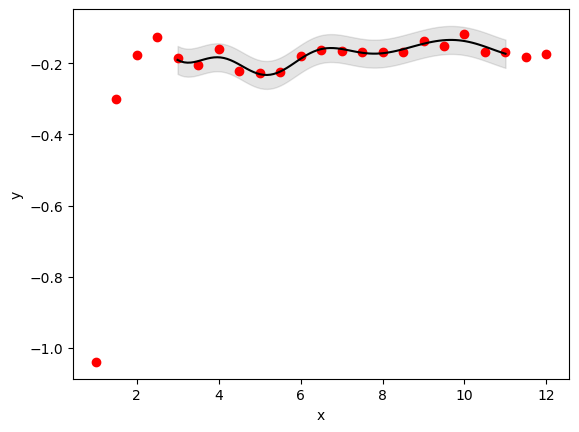

In [55]:
plot_gpr_samples(gpr, 0, plt.gca(), Xmin=3, Xmax=11)


1.0 12.0 0.0


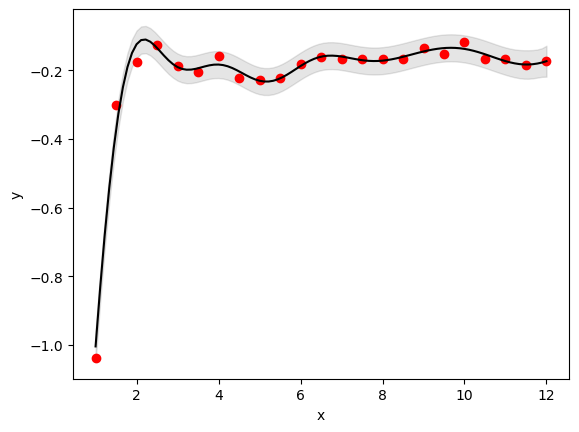

In [56]:
plot_gpr_samples(gpr, 0, plt.gca())


In [19]:
V_app.shape, t_fe.shape, Q.shape

((23, 41), (23,), (23, 41))

In [20]:
V_app[0].shape

(41,)

#### Heatmap function

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def heatmap(mat, row_labels=t_fe, col_labels=V_app[0], cmap='RdGy', title=None):
    im = plt.imshow(mat, cmap=cmap, aspect=1.0) # extent=(V_app[0].min(), V_app[0].max(), t_fe.min(), t_fe.max()))
    row_labels = np.asarray(row_labels)
    col_labels = np.asarray(col_labels)
    yticks = np.arange(0, len(row_labels), 5)
    xticks = np.arange(0, len(col_labels), 5)
    plt.xticks(xticks, labels=col_labels[xticks])
    plt.yticks(yticks, labels=row_labels[yticks])

    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    if title is not None:
        plt.gca().set_title(title)
    plt.tight_layout()

### Q values by applied voltage and $T_{fe}$

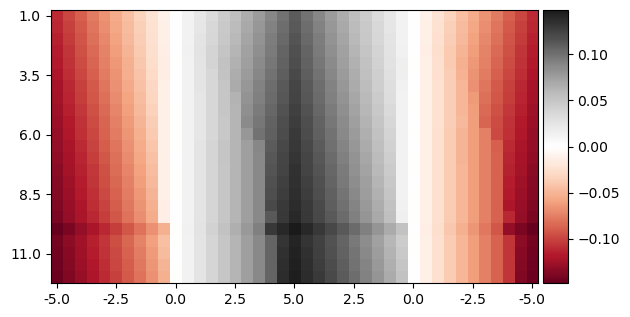

In [22]:
heatmap(Q)

#### A function for plotting V-Q curves with arrows indicating direciton of voltage sweep

In [23]:
def plot_arrows(x, y, t_fe=None):
    plt.scatter(x, y, c='k')
    for i in range(1, len(V_app[0])):
        plt.annotate("", (x[i-1], y[i-1]), (x[i], y[i]), arrowprops=dict(arrowstyle="->", color='gray'))
    if t_fe is not None:
        plt.title("$T_{fe} =" + f"{t_fe}$");

#### An example V-Q plot, using applied voltage

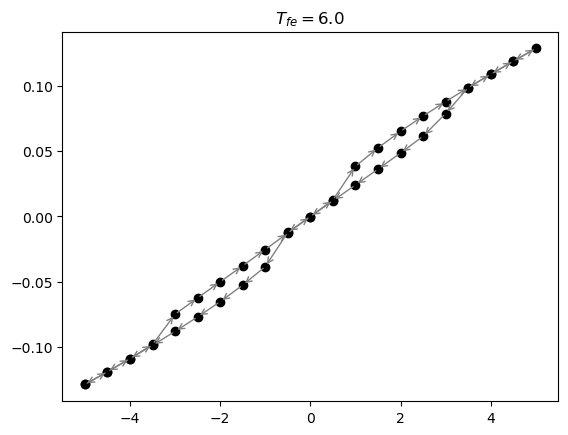

In [24]:
Q_i = 10
plot_arrows(V_app[0], Q[Q_i], t_fe[Q_i])

### Build training data for predicting $Q$ from $V$ and $T_{fe}$

In [25]:
X = np.vstack([np.repeat(t_fe, 41), V_app.ravel()]).T
y = Q.ravel()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_percentage_error
rf = RandomForestRegressor(n_estimators=100)

In [27]:
ypred = cross_val_predict(rf, X, y)

In [28]:
r2_score(y, ypred)

0.9782690033408966

#### Plot of the same example Q-V plot above, with CV-predicted Q values

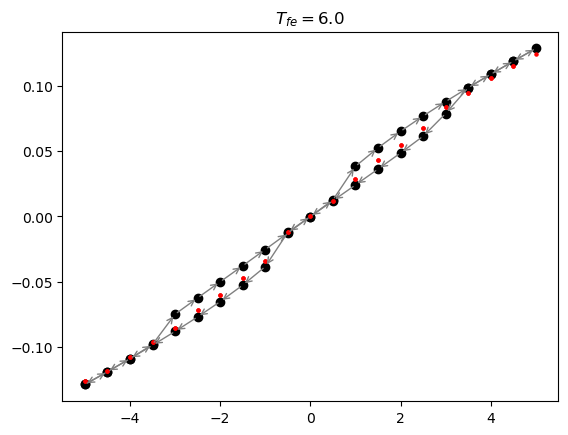

In [29]:
mask = X[:, 0] == t_fe[Q_i]
plot_arrows(X[mask, 1], y[mask], t_fe[Q_i])

plt.scatter(X[mask, 1], ypred[mask], color='red', s=5)

In [30]:
r2s = np.zeros_like(t_fe)
for i in range(len(t_fe)):
    mask = X[:, 0] == t_fe[i]
    r2s[i] = r2_score(y[mask], ypred[mask])

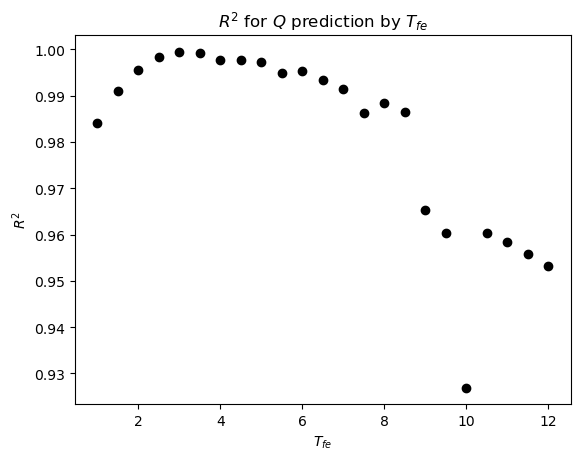

In [31]:
plt.scatter(t_fe, r2s, c='k')
plt.xlabel("$T_{fe}$")
plt.ylabel("$R^2$")
plt.title("$R^2$ for $Q$ prediction by $T_{fe}$");

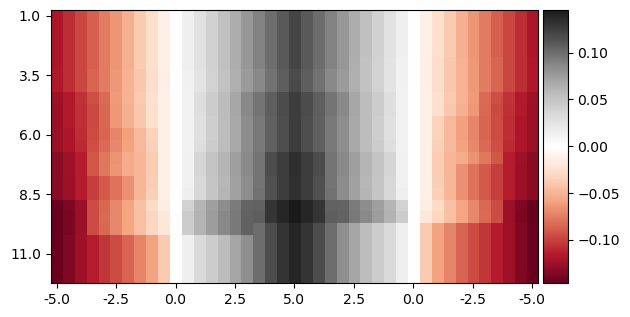

In [32]:
heatmap(ypred.reshape(Q.shape))

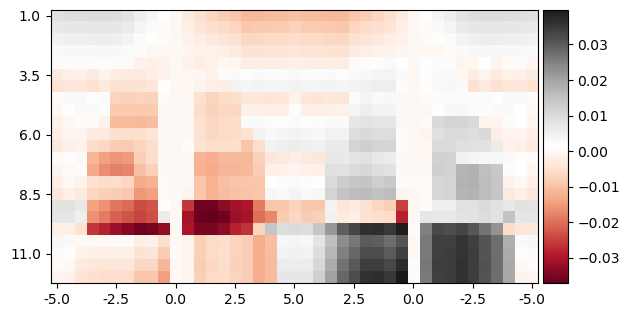

In [33]:
heatmap(Q - ypred.reshape(Q.shape))

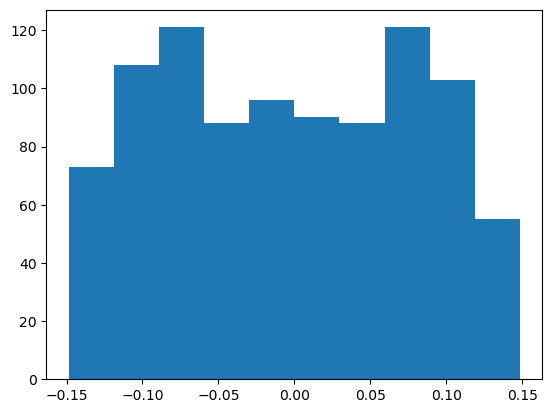

In [34]:
plt.hist(Q.ravel());

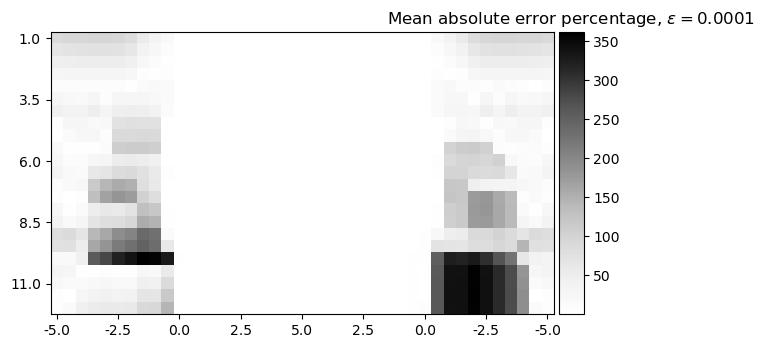

In [35]:
eps = 0.0001
heatmap(np.abs((Q - ypred.reshape(Q.shape))/(np.maximum(ypred.reshape(Q.shape), eps))), cmap='Greys', title=f'Mean absolute error percentage, $\epsilon = {eps}$')

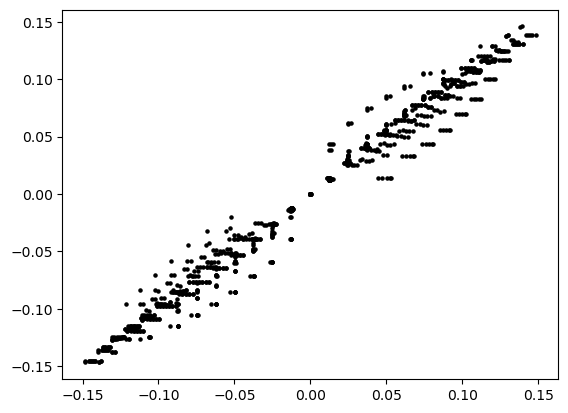

In [36]:
plt.scatter(Q.ravel(), ypred, s=5, c='k')